# Plottong styles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
xs = np.linspace(-6, 6, 100)
ys = np.sinc(xs)

In [3]:
df = pd.DataFrame({'x': xs, 'sinc(x)': ys})
df.head()

,x,sinc(x)
0,-6.000000,-3.898172e-17
1,-5.878788,-2.012385e-02
2,-5.757576,-3.815130e-02
3,-5.636364,-5.137086e-02
4,-5.515152,-5.765016e-02


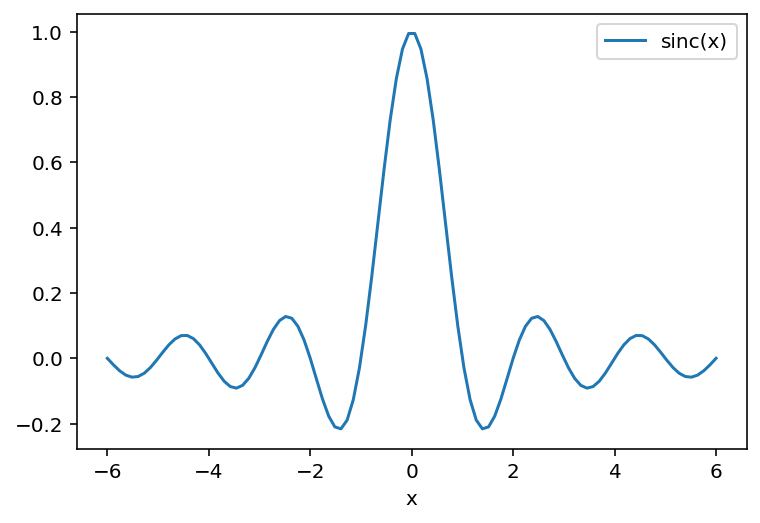

In [6]:
df.plot.line(x='x', y='sinc(x)')

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

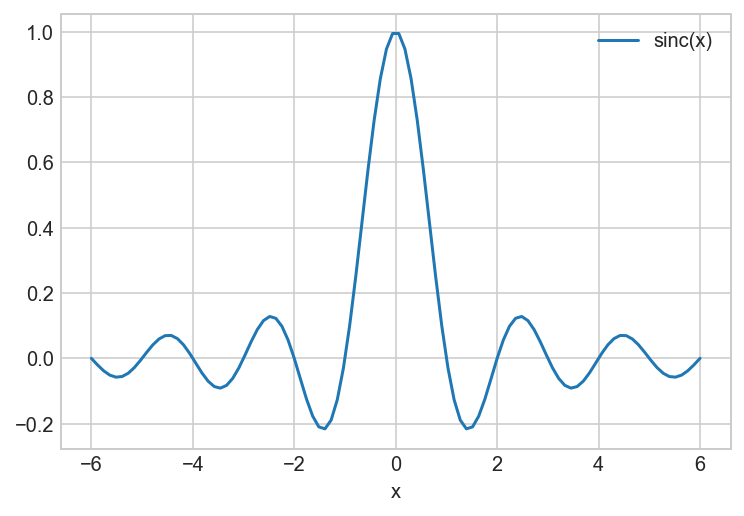

In [8]:
plt.style.use('seaborn-whitegrid')
df.plot.line(x='x', y='sinc(x)')

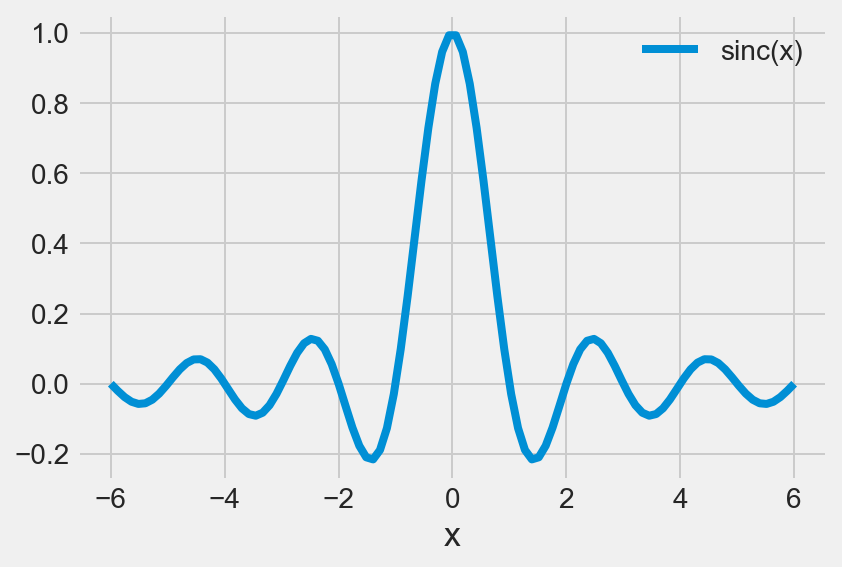

In [9]:
plt.style.use('fivethirtyeight')
df.plot.line(x='x', y='sinc(x)')

# Pandas Styles

In [10]:
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

In [12]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['price'] = boston['target']

In [14]:
hdf = df[:10]
hdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
hdf.style.highlight_max()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [17]:
hdf.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [18]:
hdf.style.bar()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [19]:
def odd_green(val):
    if val % 2 != 0:
        return 'color: green'
    return ''

In [20]:
hdf.style.applymap(odd_green)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [21]:
def orange10(val):
    if val > 10:
        return 'background-color: orange'
    return ''

In [22]:
hdf.style.applymap(odd_green).applymap(orange10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [23]:
hdf.style.applymap(odd_green, subset=['ZN', 'RAD'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [25]:
def top_20(col):
    is_top20 = col > col.quantile(0.8)
    return ['font-weight: bold' if v else '' for v in is_top20]

In [27]:
hdf.style.apply(top_20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [28]:
import qgrid

# Using MPL

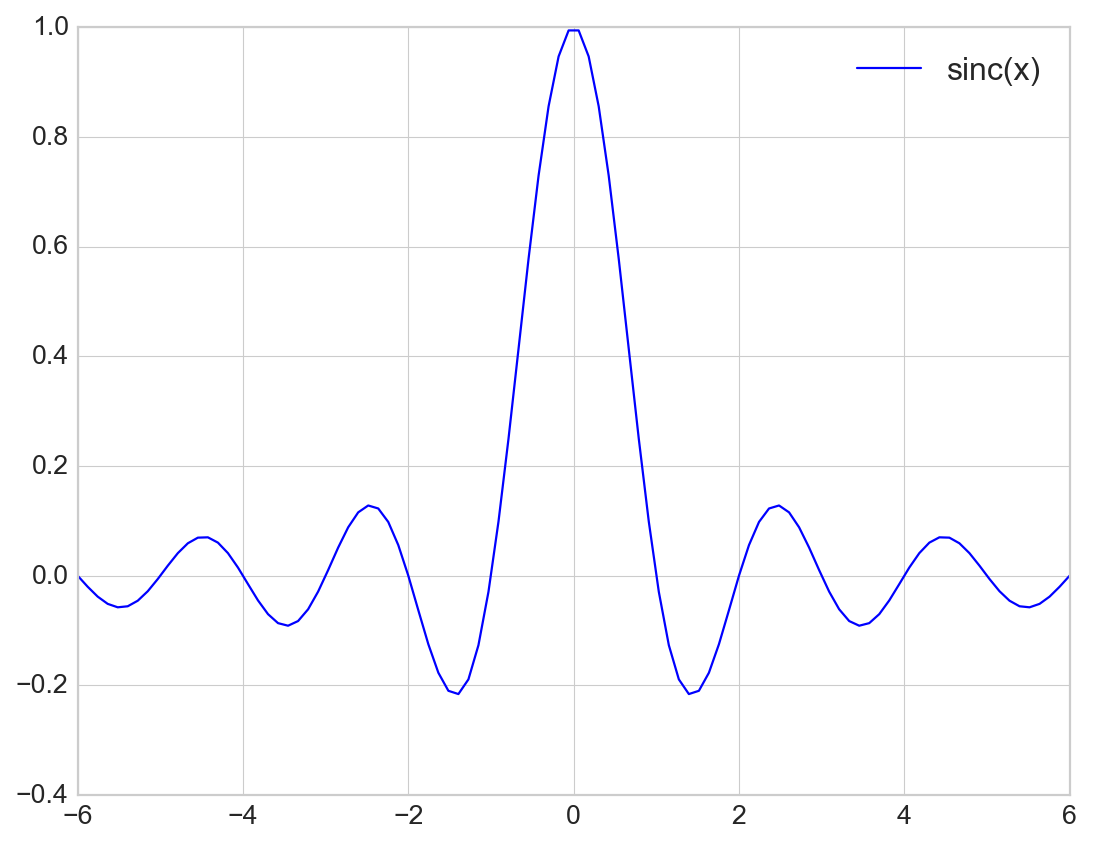

In [42]:
plt.style.use('seaborn-whitegrid')
plt.plot(xs, ys, label='sinc(x)')
plt.legend()

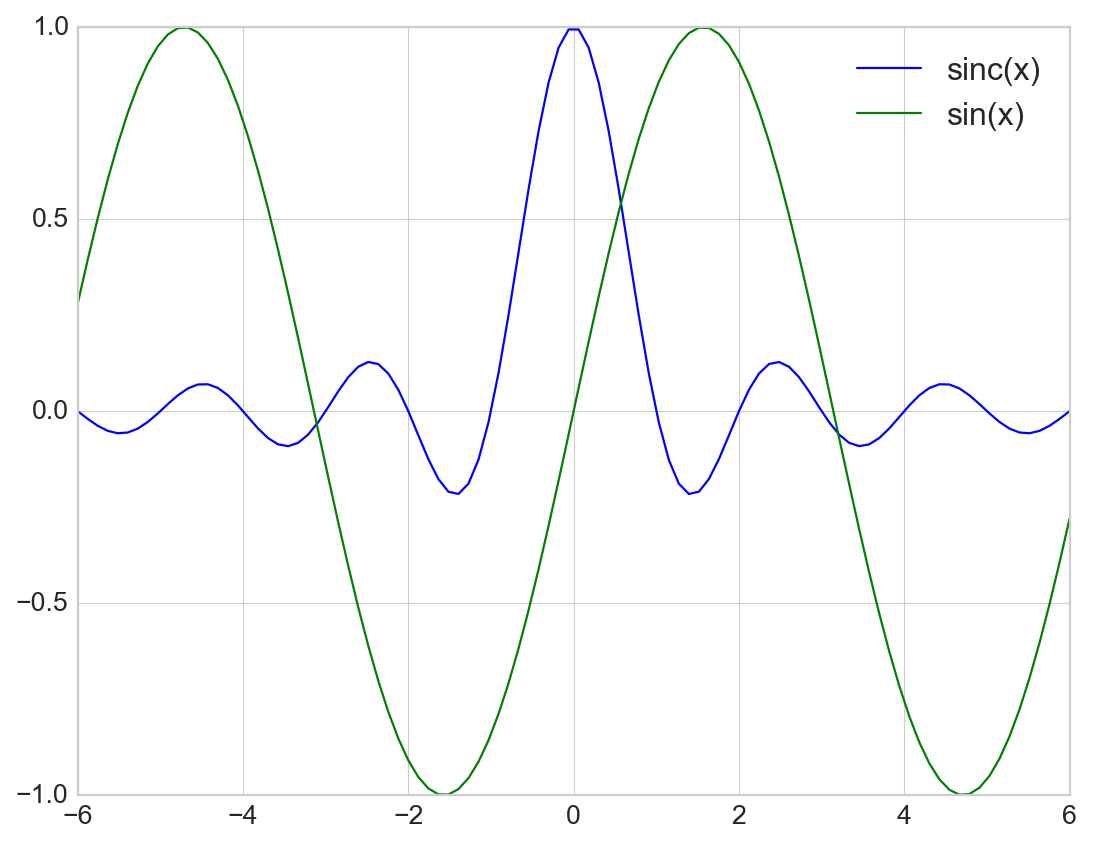

In [43]:
plt.plot(xs, ys, label='sinc(x)')
plt.plot(xs, np.sin(xs), label='sin(x)')
plt.legend()

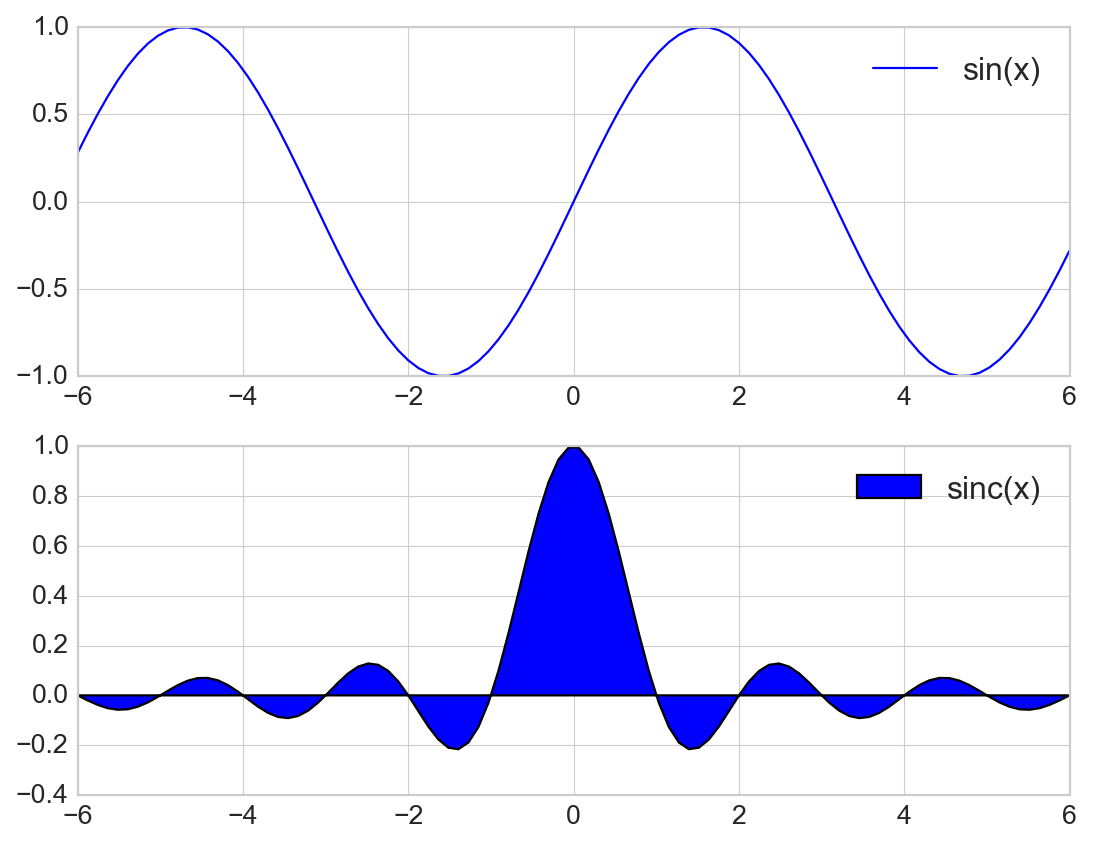

In [47]:
plt.subplot(211)
plt.plot(xs, np.sin(xs), label='sin(x)')
plt.legend()
plt.subplot(212)
plt.fill(xs, ys, label='sinc(x)')
plt.legend()

# Tips

In [50]:
df = pd.read_csv('lnkd.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-07,195.95,195.98,195.94,195.96,3024607
2016-12-06,195.28,195.95,195.26,195.94,4005017
2016-12-05,195.25,195.40,195.25,195.25,1184931
2016-12-02,195.25,195.35,195.17,195.20,1520838
2016-12-01,195.22,195.40,195.14,195.31,1683012


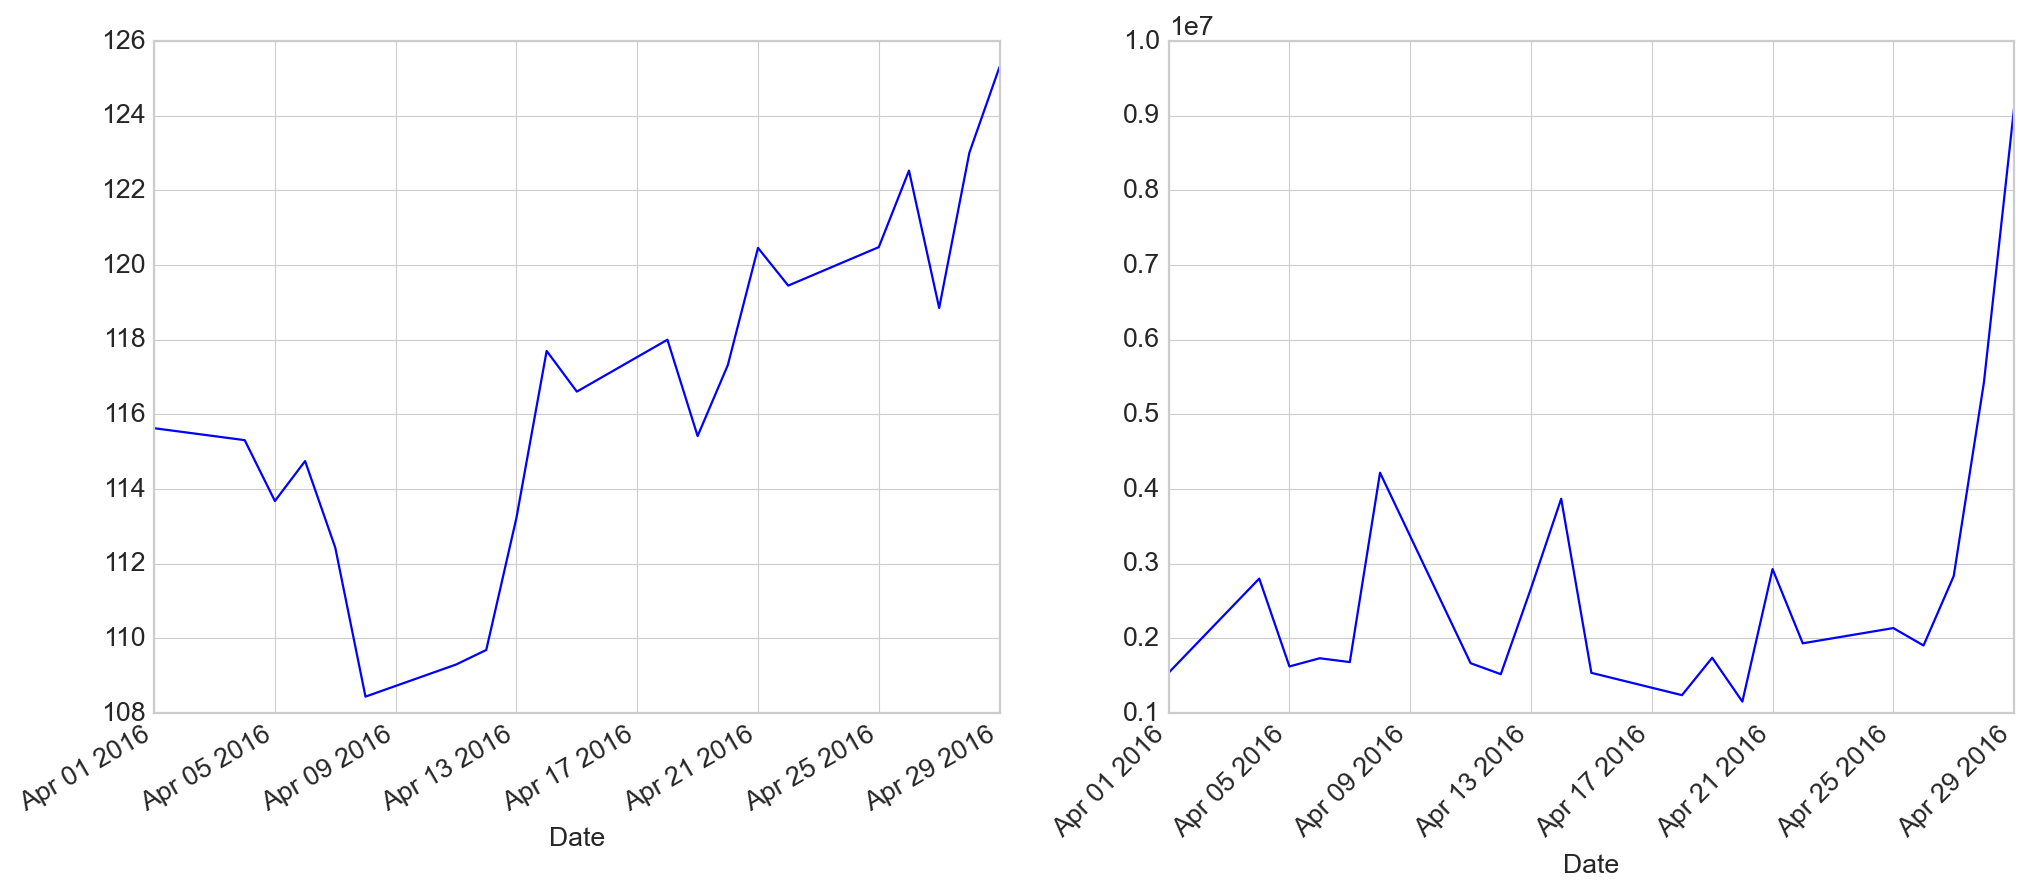

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
df.loc['2016-04', 'Close'].plot(ax=ax1)
df.loc['2016-04', 'Volume'].plot(ax=ax2, rot=45)

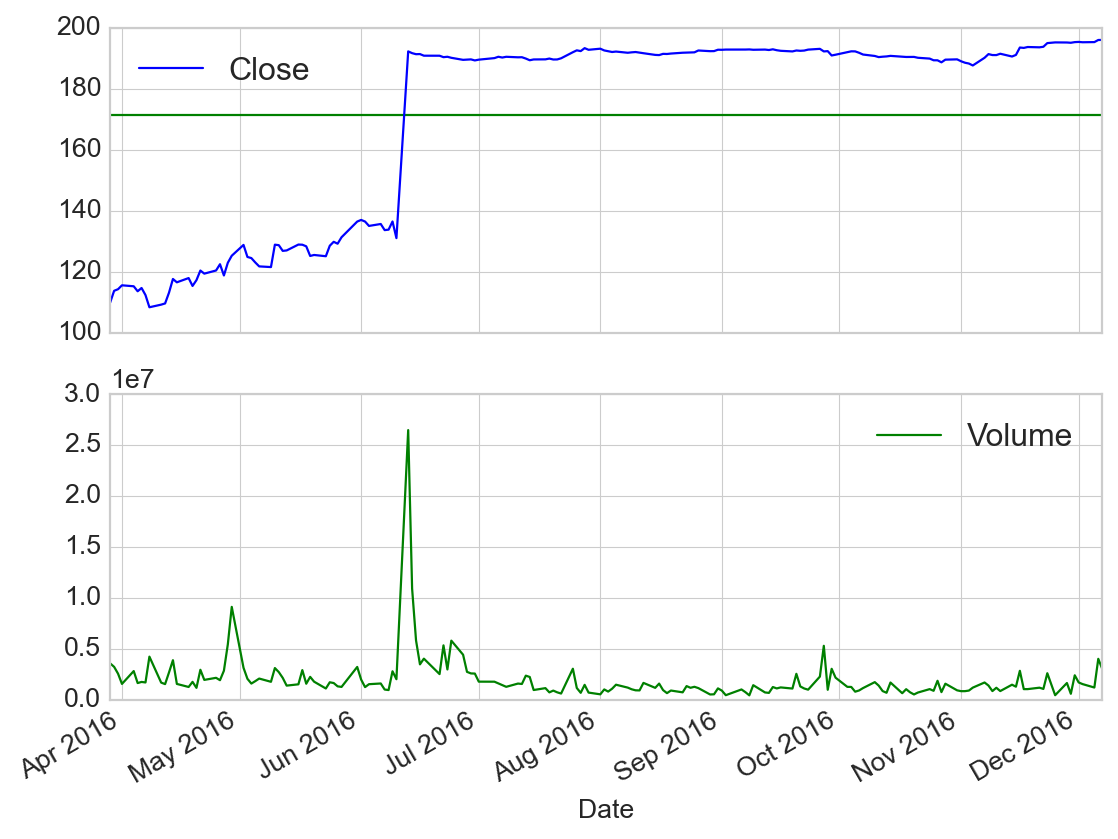

In [52]:
cax, vax = df[['Close', 'Volume']].plot(subplots=True)
xmin, xmax = cax.get_xlim()
cax.hlines(df['Close'].mean(), xmin, xmax, color='green')